<div style="font-size: 30px"><b>Data Sources</b></div>

This project uses the Fetal Health dataset from https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification. 

As required by the data source, we cite the following article

<i>Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318</i>

<div style="font-size: 30px"><b>Project Objectives</b></div>

<div style="font-size: 20px">The dataset contains observation records of Cardiotocogram (CTG) exams which are used to assess fetal health. The health state of each record is assigned by obstetritians into one of three classes: <b>normal</b>, <b>suspect</b> and <b>pathological</b>. The goal of this project is to explore the relationship between the CTG observation features with the health state and develop classification models that infer the latter from exam results.</div>

<div style="font-size: 30px"><b>Feature Details</b></div>

<div style="border: 1px solid lightgrey; padding: 12px" ><div><b>baseline value</b>: Baseline Fetal Heart Rate</div>
<div><b>accelerations</b>: Number of short-term increases in a fetus's heart rate per second</div>
<div><b>fetal_movement</b>: Number of fetal movements per second</div>
<div><b>uterine_contractions</b>: Number of uterine contractions per second</div>
<div style="margin-top: 10px">
For the following 3 variables, note that decelerations are descreases in fetal heart rate.
<div><b>light_decelerations</b>: Number of light decelerations per second</div>
<div><b>severe_decelerations</b>: Number of severe decelerations per second</div>
<div><b>prolongued_decelerations</b>: Number of prolongued decelerations per second</div>
<div><b>abnormal_short_term_variability</b>: Percentage of time with abnormal short term variability</div>
<div><b>mean_value_of_short_term_variability</b>: Mean value of short term variability</div>
<div><b>percentage_of_time_with_abnormal_long_term_variability</b>: Percentage of time with abnormal long term variability</div>
<div><b>mean_value_of_long_term_variability</b>: Mean value of long term variability</div>
</div>
<div style="margin-top: 10px">
For all histogram related features, the histogram in question is that of the fetal heart rate measurements in the exam.
<div><b>histogram_width</b>: Width of the histogram made using all values from a record</div>
<div><b>histogram_min</b>: Histogram minimum value</div>
<div><b>histogram_max</b>: Histogram maximum value</div>
<div><b>histogram_number_of_peaks</b>: Number of peaks in the exam histogram</div>
<div><b>histogram_number_of_zeroes</b>: Number of zeroes in the exam histogram</div>
<div><b>histogram_mode</b>: Histogram mode</div>
<div><b>histogram_mean</b>: Histogram mean</div>
<div><b>histogram_median</b>: Histogram median</div>
<div><b>histogram_variance</b>: Histogram variance</div>
<div><b>histogram_tendency</b>: Histogram tendency</div>
<div><b>fetal_health</b>: number representing the health class 1 (normal), 2 (suspect) or 3 (pathological) </div>
</div>
</div>

<div style="font-size: 30px"><b>Explorative Data Analysis</b></div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
health_data = pd.read_csv('fetal_health.csv')

In [6]:
health_data.shape

(2126, 22)

In [8]:
health_data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [15]:
health_data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<div style="font-size: 20px"><b>f</b></div>

<Axes: xlabel='fetal_health', ylabel='count'>

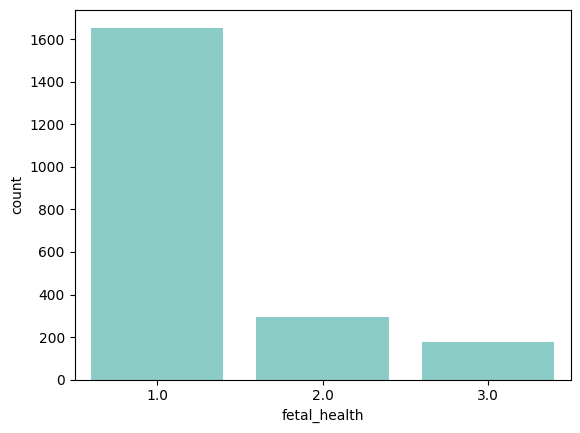

In [23]:
sns.countplot(data= health_data, x="fetal_health", alpha=0.5, color='#05b0a3')

<b>We see that the majority of the records have fetal_health 1. Given this imbalance in data, when diagnosing the accuracy of models, we cannot reply solely on the misclarification rate. Instead, we need to look at other measures such as precision and recall.</b>